In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.svm import SVR

**PROBLEM STATEMENT**

 To Predict best prices for listed prices of a GMC truck.

**LOADING THE CSV FILE WITH PANDAS DATAFRAME**

In [49]:
data = pd.read_csv('trucks.csv')

**TAKING QUICK LOOK AT THE DATA STRUCTURE**

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   list_price  23 non-null     float64
 1   best_price  23 non-null     float64
dtypes: float64(2)
memory usage: 496.0 bytes


In [51]:
data.describe()

,list_price,best_price
count,23.000000,23.000000
mean,17.465217,15.300000
std,2.413901,2.057580
min,12.400000,11.200000
25%,15.800000,14.050000
50%,17.299999,15.100000
75%,19.300000,16.849999
max,22.400000,19.600000


In [52]:
data.columns

Index(['list_price', 'best_price'], dtype='object')

In [53]:
data.isna().sum()   # their is no missing value in the dataset

list_price    0
best_price    0
dtype: int64

**SPLITTING INTO TRAINING AND TESTING DATA** 

In [54]:
x = data.list_price
y = data.best_price
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)

**DISCOVER AND VISUALIZE THE DATA TO GAIN INSIGHTS**

Text(0, 0.5, 'Best Price')

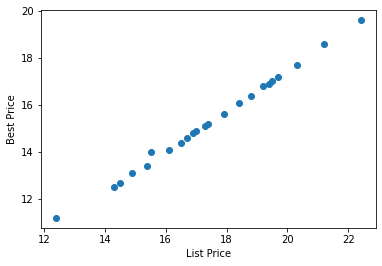

In [55]:
# As per graph their is a linear relationship between list_price and best_price
plt.scatter(x= data.list_price, y = data.best_price)
plt.xlabel('List Price')
plt.ylabel('Best Price')

**PREPARING THE DATA FOR MACHINE LEARNING ALOGORITHM**

In [56]:
# Converting the data to numpy array as the per requirements 
X_train = np.array(X_train).reshape((-1, 1))
Y_train = np.array(Y_train)
X_test = np.array(X_test).reshape((-1, 1))
Y_test =  np.array(Y_test)

**MODEL-1 (LINEAR REGRESSION)**

In [57]:
# Creating Linear regression object
lm = LinearRegression()
lm

LinearRegression()

In [58]:
# Fitting X and Y training set into linear model
lm.fit(X_train,Y_train)

LinearRegression()

In [14]:
# Predicting the value of Y with x_train and linear regression object and observing the difference 
Yhat = lm.predict(X_train)
print("Predicted Best Price:", Yhat)
print("Orginal Best Price:", Y_train)

Predicted Best Price: [16.10416751 12.61376908 18.48785554 14.4866659  13.55021708 16.44469391
 16.95548431 19.50943473 13.12455868 15.6785091  15.16771869 17.21088033
 13.63534909 10.99626666 16.78522192 15.2528507  12.78403228 14.9123243 ]
Orginal Best Price: [16.10000038 12.5        18.60000038 14.39999962 13.39999962 16.39999962
 16.89999962 19.60000038 13.10000038 15.60000038 15.10000038 17.20000076
 14.         11.19999981 16.79999924 15.19999981 12.69999981 14.89999962]


In [15]:
print("Coefficient: %.2f" % lm.coef_)
print("Intercept: %.2f" % lm.intercept_)

Coefficient: 0.85
Intercept: 0.44


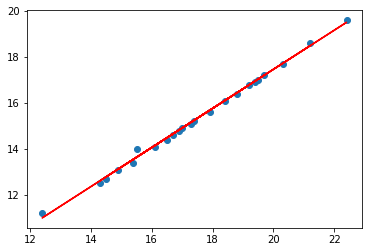

In [16]:
# Plotting linear regression model on graph
plt.scatter(data.list_price, data.best_price)
plt.plot(X_train, lm.predict(X_train), color='red')

**EVALUATING LINEAR REGRESSION MODEL**(MAE, RMSE, R2 SCORE)

In [17]:
# Since our data has less outliers Mean Square Error(MSE) will be best method to start with evaluating 
print("Mean Absolute Error: %.3f" % mean_absolute_error(Y_train, Yhat))
print("Root Mean Squared Error: %.3f" % np.sqrt(mean_squared_error(Y_train, Yhat)))
print("R2 Score: %.3f" % np.sqrt(r2_score(Y_train, Yhat))) #  % of y data is explained by x 

Mean Absolute Error: 0.087
Root Mean Squared Error: 0.121
R2 Score: 0.998


In [18]:
# Converting list_price and best_price variable to numpy array 
list_price = np.array(data.list_price).reshape((-1, 1))
best_price = np.array(data.best_price)

array([[12.39999962],
       [14.30000019],
       [14.5       ],
       [14.89999962],
       [16.10000038],
       [16.89999962],
       [16.5       ],
       [15.39999962],
       [17.        ],
       [17.89999962],
       [18.79999924],
       [20.29999924],
       [22.39999962],
       [19.39999962],
       [15.5       ],
       [16.70000076],
       [17.29999924],
       [18.39999962],
       [19.20000076],
       [17.39999962],
       [19.5       ],
       [19.70000076],
       [21.20000076]])

In [19]:
# Performing cross vadilation on Linear Regression Model
scores = cross_val_score(lm, list_price, best_price, cv=8, scoring='r2' ) # 8 fold cross validation and result will be R Square score 

In [20]:
scores # Here we see cross validation score of 8 different (train and test) set based on linear regression model 
    # Maximum we can get 99.8% accuracy with this model 

array([0.94590291, 0.99797167, 0.97003369, 0.99628905, 0.98908503,
       0.99390338, 0.9980119 , 0.97837272])

**MODEL-2 (DecisionTreeRegressor)**

In [22]:
# Creating DicisionTreeRegressor Object 
rt = DecisionTreeRegressor()

In [23]:
# fitting X and y Training set into the model
rt.fit(X_train, Y_train)

DecisionTreeRegressor()

In [24]:
# Predicting the Y(best_price) based on the list_price(Traning data)
y_hat = rt.predict(X_train)
print(y_hat)
print(Y_train)

[16.10000038 12.5        18.60000038 14.39999962 13.39999962 16.39999962
 16.89999962 19.60000038 13.10000038 15.60000038 15.10000038 17.20000076
 14.         11.19999981 16.79999924 15.19999981 12.69999981 14.89999962]
[16.10000038 12.5        18.60000038 14.39999962 13.39999962 16.39999962
 16.89999962 19.60000038 13.10000038 15.60000038 15.10000038 17.20000076
 14.         11.19999981 16.79999924 15.19999981 12.69999981 14.89999962]


In [25]:
# Evaluating using regression Metrics 
print("Mean Absolute Error: %.3f" % mean_absolute_error(Y_train, y_hat))
print("Root Mean Squared Error: %.3f" % np.sqrt(mean_squared_error(Y_train, y_hat)))
print("R2 Score: %.3f" % np.sqrt(r2_score(Y_train, y_hat)))

Mean Absolute Error: 0.000
Root Mean Squared Error: 0.000
R2 Score: 1.000


In [67]:
# Performing cross validation on regression model 
scores = cross_val_score(rt, list_price, best_price, cv=8, scoring='r2' )
scores   # Here we see negative R value and only few are above 90 means it is not good model 

array([-2.11306732,  0.82191785,  0.64857087,  0.77744818,  0.91266466,
        0.88000055,  0.98458902,  0.13265298])

**MODEL-3(SUPPORT VECTOR REGRESSOR)**

In [27]:
# Creating a support vector regression object 
regressor = SVR()

In [34]:
# Fitting X_train and Y_train into regressor object 
regressor.fit(X_train, Y_train)

SVR()

In [35]:
y_hat = regressor.predict(X_train)

In [65]:
print("Mean Absolute Error: %.3f" % mean_absolute_error(Y_train, y_hat))
print("Root Mean Squared Error: %.3f" % np.sqrt(mean_squared_error(Y_train, y_hat)))

Mean Absolute Error: 2.198
Root Mean Squared Error: 2.916


Root Mean Squared Error: 0.763


In [39]:
scores = cross_val_score(regressor, list_price, best_price, cv=8, scoring='r2' )
scores # Here we see negative R values and only few are above 90% means it is not good model 

array([-19.36253852,   0.99743063,   0.95174757,   0.96476074,
         0.22838409,   0.98932947,   0.99665556,  -1.3104978 ])

**After performing evaluation we found out that Linear regression model gives the best accuracy.
SO FINALLY PREDICTING TEST SET ON LINEAR MODEL** 

In [69]:
# Predicting Unseen test set on linear regression model 
Yhat = lm.predict(X_test)

In [73]:
# Predicting first 6 values 
print("predicted :",Yhat[:6])   
print("actual :",Y_test[:6])

predicted : [16.10220215 16.78218564 13.12727864 14.487244   15.67721308]
actual : [16.10000038 16.79999924 13.10000038 14.39999962 15.60000038]


In [72]:

print("Mean Absolute Error: %.3f" % mean_absolute_error(Y_test, Yhat))
print("Root Mean Squared Error: %.3f" % np.sqrt(mean_squared_error(Y_test, Yhat)))
print("R2 Score: %.3f" % np.sqrt(r2_score(Y_test, Yhat)))

Mean Absolute Error: 0.042
Root Mean Squared Error: 0.054
R2 Score: 0.999
